In [2]:
import requests
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch
import torch
import random
import math, time, os
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import numpy as np
import torch
from torch import nn
from torch import optim
from IPython import display
import psutil, gc
# utils.hide_toggle('Imports 2')
from torch.utils.data import Dataset
import sklearn.datasets as skds
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import math
from numpy import sin, pi
from matplotlib import pyplot as plt
from torchvision.datasets import MNIST
import pathlib
from PIL import Image
from PIL.ImageOps import invert
from IPython import display
from time import sleep
import pickle
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('df_synA_train_shuffled.csv',on_bad_lines='skip')


### Target Column

In [ ]:
df = pd.read_csv('df_synA_train_shuffled.csv',on_bad_lines='skip')
df = df.dropna()
class_values=list(df.target_5_val.unique())
def encode(v,class_values=class_values):
    return class_values.index(v)
df['era_label']=df['target_5_val'].apply(encode)
df['era_label'].unique()
df_train=df.iloc[0:(len(df)*7)//10]
df_test = df.iloc[(len(df)*7)//10:]
x_train=df_train.iloc[:,0:-6].values
y_train=df_train.iloc[:,-1].values
x_test=df_test.iloc[:,0:-6].values
y_test=df_test.iloc[:,-1].values
# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

#### RNN Simple

In [ ]:
# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Number of features for input
num_features = x_train.shape[1]

# Number of classes for output layer
num_classes = y_train_encoded.shape[1]

In [ ]:
# Building a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, num_features), activation='relu'))  # 50 units in RNN layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                3800      
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 4055 (15.84 KB)
Trainable params: 4055 (15.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Building a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, num_features), activation='relu'))  # 50 units in RNN layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
model.fit(x_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
6825/6825 [==============================] - 25s 3ms/step - loss: 1.2283 - accuracy: 0.5526 - val_loss: 1.0637 - val_accuracy: 0.5925
Epoch 2/10
6825/6825 [==============================] - 22s 3ms/step - loss: 1.0571 - accuracy: 0.5946 - val_loss: 1.0394 - val_accuracy: 0.6042
Epoch 3/10
6825/6825 [==============================] - 27s 4ms/step - loss: 1.0461 - accuracy: 0.6000 - val_loss: 1.0271 - val_accuracy: 0.6133
Epoch 4/10
6825/6825 [==============================] - 23s 3ms/step - loss: 1.0366 - accuracy: 0.6036 - val_loss: 1.0111 - val_accuracy: 0.6113
Epoch 5/10
6825/6825 [==============================] - 23s 3ms/step - loss: 0.9735 - accuracy: 0.6367 - val_loss: 0.9340 - val_accuracy: 0.6486
Epoch 6/10
6825/6825 [==============================] - 22s 3ms/step - loss: 0.9262 - accuracy: 0.6573 - val_loss: 0.9234 - val_accuracy: 0.6555
Epoch 7/10
6825/6825 [==============================] - 22s 3ms/step - loss: 0.8828 - accuracy: 0.6750 - val_loss: 0.8526 - val_ac

#### Average Complexity RNN

In [11]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30
6825/6825 [==============================] - 33s 4ms/step - loss: 1.0237 - accuracy: 0.6000 - val_loss: 0.8660 - val_accuracy: 0.6668
Epoch 2/30
6825/6825 [==============================] - 28s 4ms/step - loss: 0.8056 - accuracy: 0.6901 - val_loss: 0.7459 - val_accuracy: 0.7152
Epoch 3/30
6825/6825 [==============================] - 29s 4ms/step - loss: 0.7281 - accuracy: 0.7203 - val_loss: 0.7264 - val_accuracy: 0.7216
Epoch 4/30
6825/6825 [==============================] - 28s 4ms/step - loss: 0.6753 - accuracy: 0.7402 - val_loss: 0.6547 - val_accuracy: 0.7480
Epoch 5/30
6825/6825 [==============================] - 30s 4ms/step - loss: 0.6443 - accuracy: 0.7509 - val_loss: 0.6204 - val_accuracy: 0.7607
Epoch 6/30
6825/6825 [==============================] - 28s 4ms/step - loss: 0.6239 - accuracy: 0.7586 - val_loss: 0.6060 - val_accuracy: 0.7664
Epoch 7/30
6825/6825 [==============================] - 29s 4ms/step - loss: 0.6085 - accuracy: 0.7637 - val_loss: 0.6110 - val_ac

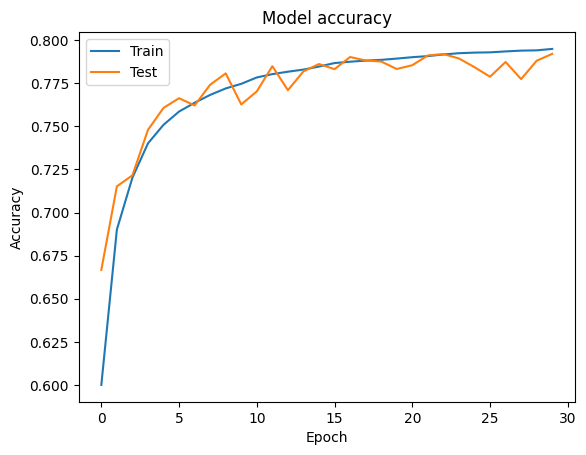

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### LSTM

In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First LSTM layer
model.add(LSTM(50, activation='relu'))  # Second LSTM layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.5625 - loss: 1.0594 - val_accuracy: 0.7047 - val_loss: 0.7606
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7194 - loss: 0.7241 - val_accuracy: 0.7457 - val_loss: 0.6567
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7490 - loss: 0.6467 - val_accuracy: 0.7609 - val_loss: 0.6133
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7610 - loss: 0.6151 - val_accuracy: 0.7614 - val_loss: 0.6063
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7658 - loss: 0.5970 - val_accuracy: 0.7683 - val_loss: 0.6002
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7719 - loss: 0.5806 - val_accuracy: 0.7662 - val_loss: 0.5914
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7747 - loss: 0.5728 - val_accuracy: 0.7793 - val_loss: 0.5608
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7797 - loss: 0.5612 - val_accurac

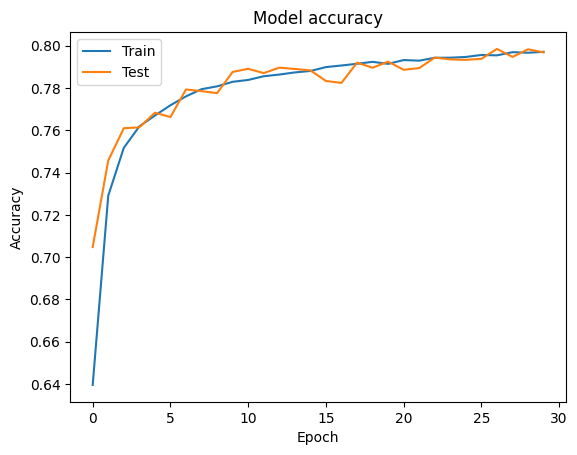

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### LSTM with Dropout and Regularization

Epoch 1/20


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.4879 - loss: 1.7894 - val_accuracy: 0.5085 - val_loss: 1.3521
Epoch 2/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.4925 - loss: 1.2741 - val_accuracy: 0.2755 - val_loss: 1.8926
Epoch 3/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.5142 - loss: 1.2358 - val_accuracy: 0.5373 - val_loss: 1.2098
Epoch 4/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.4915 - loss: 1.2634 - val_accuracy: 0.4949 - val_loss: 1.3270
Epoch 5/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.4901 - loss: 1.2649 - val_accuracy: 0.3219 - val_loss: 1.7030
Epoch 6/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.4900 - loss: 1.2674 - val_accuracy: 0.5716 - val_loss: 1.1513
Epoch 7/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.4896 - loss: 1.2672 - val_accuracy: 0.3399 - val_loss: 1.7036
Epoch 8/20
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.4923 - loss: 1.2644 - val

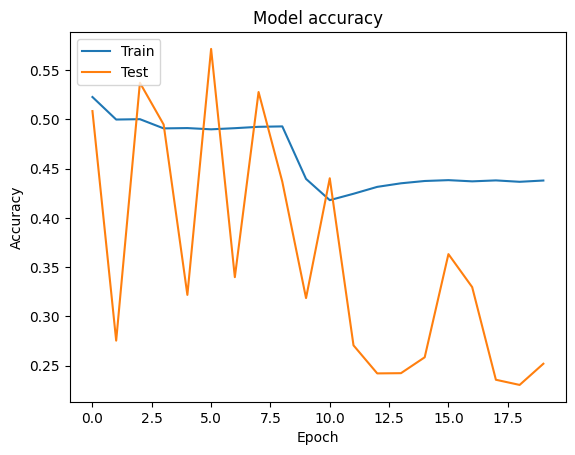

In [9]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(1, num_features), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(100, return_sequences=True, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(100, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=20, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


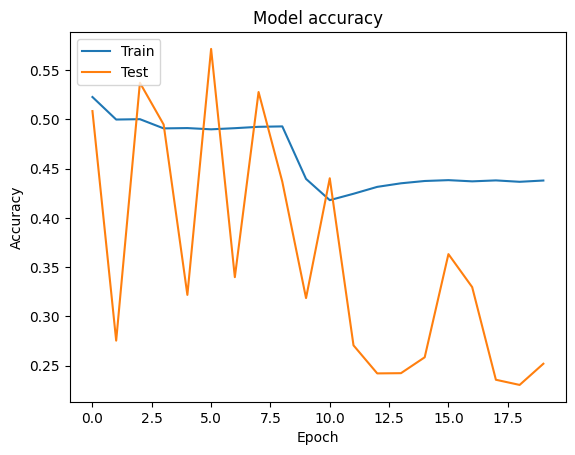

In [10]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Feature selection with RF Classifer (Dropout)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_5_val' with your actual target column name
X = df.drop('target_5_val', axis=1).iloc[:, :-6]  # Features
y = df['target_5_val']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['target_5_val']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  

In [8]:
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, num_features)))
model.add(Dropout(0.2))  # Dropout layer after the first LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Dropout layer after the second LSTM layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 981us/step - accuracy: 0.5884 - loss: 1.0601 - val_accuracy: 0.6868 - val_loss: 0.8149
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - accuracy: 0.6808 - loss: 0.8381 - val_accuracy: 0.7184 - val_loss: 0.7330
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 921us/step - accuracy: 0.7054 - loss: 0.7727 - val_accuracy: 0.7287 - val_loss: 0.6978
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 965us/step - accuracy: 0.7174 - loss: 0.7413 - val_accuracy: 0.7417 - val_loss: 0.6753
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 927us/step - accuracy: 0.7232 - loss: 0.7198 - val_accuracy: 0.7451 - val_loss: 0.6532
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7301 - loss: 0.7036 - val_accuracy: 0.7531 - val_loss: 0.6408
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 966us/step - accuracy: 0.7325 - loss: 0.6924 - val_accuracy: 0.7510 - val_loss: 0.6294
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7368 - loss: 0.6817 -

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### LSTM with Feature selection with RF Classifer (No Dropout)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_5_val' with your actual target column name
X = df.drop('target_5_val', axis=1).iloc[:, :-6]  # Features
y = df['target_5_val']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['target_5_val']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, num_features)))
model.add(LSTM(units=50))
model.add(Dense(units=num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 939us/step - accuracy: 0.6136 - loss: 0.9936 - val_accuracy: 0.7006 - val_loss: 0.7739
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7077 - loss: 0.7596 - val_accuracy: 0.7330 - val_loss: 0.6961
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7343 - loss: 0.6924 - val_accuracy: 0.7439 - val_loss: 0.6619
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7472 - loss: 0.6570 - val_accuracy: 0.7510 - val_loss: 0.6438
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 958us/step - accuracy: 0.7527 - loss: 0.6384 - val_accuracy: 0.7571 - val_loss: 0.6261
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 901us/step - accuracy: 0.7592 - loss: 0.6206 - val_accuracy: 0.7626 - val_loss: 0.6115
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 874us/step - accuracy: 0.7607 - loss: 0.6108 - val_accuracy: 0.7599 - val_loss: 0.6071
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 879us/step - accuracy: 0.7629 - loss: 0.6011 - v

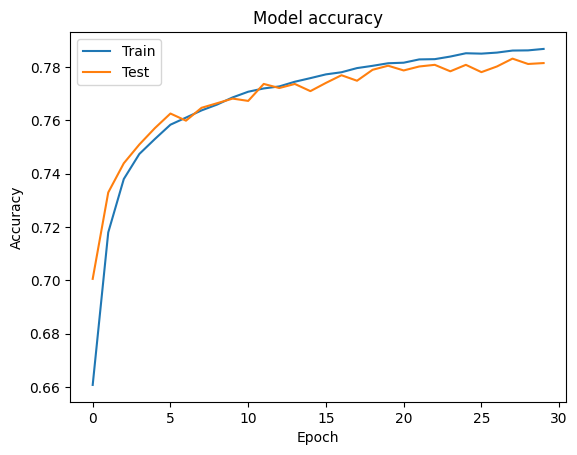

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### RNN with Feature selection with RF Classifer (No Dropout)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_5_val' with your actual target column name
X = df.drop('target_5_val', axis=1).iloc[:, :-6]  # Features
y = df['target_5_val']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['target_5_val']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

In [14]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 833us/step - accuracy: 0.6589 - loss: 0.8837 - val_accuracy: 0.7297 - val_loss: 0.6894
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 812us/step - accuracy: 0.7403 - loss: 0.6672 - val_accuracy: 0.7529 - val_loss: 0.6265
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 5s 800us/step - accuracy: 0.7533 - loss: 0.6256 - val_accuracy: 0.7516 - val_loss: 0.6236
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 834us/step - accuracy: 0.7615 - loss: 0.6026 - val_accuracy: 0.7681 - val_loss: 0.5872
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 5s 801us/step - accuracy: 0.7667 - loss: 0.5892 - val_accuracy: 0.7707 - val_loss: 0.5765
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 850us/step - accuracy: 0.7680 - loss: 0.5818 - val_accuracy: 0.7702 - val_loss: 0.5757
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 813us/step - accuracy: 0.7710 - loss: 0.5708 - val_accuracy: 0.7716 - val_loss: 0.5661
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 862us/step - accuracy: 0.7738 - loss: 0.56

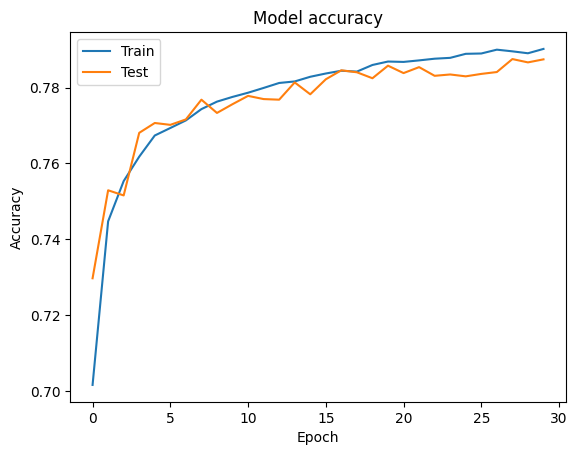

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Era Column

For Era column we only try the best 3 approaches that worked with target columns

In [4]:
df = pd.read_csv('df_synA_train_shuffled.csv',on_bad_lines='skip')
df = df.dropna()
class_values=list(df.era.unique())
def encode(v,class_values=class_values):
    return class_values.index(v)
df['era_label']=df['era'].apply(encode)
df['era_label'].unique()
df_train=df.iloc[0:(len(df)*7)//10]
df_test = df.iloc[(len(df)*7)//10:]
x_train=df_train.iloc[:,0:-6].values
y_train=df_train.iloc[:,-1].values
x_test=df_test.iloc[:,0:-6].values
y_test=df_test.iloc[:,-1].values
# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

#### Average Complexity RNN

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.2808 - loss: 2.0743 - val_accuracy: 0.5015 - val_loss: 1.3058
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 902us/step - accuracy: 0.5536 - loss: 1.1724 - val_accuracy: 0.6457 - val_loss: 0.9146
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 856us/step - accuracy: 0.6503 - loss: 0.8894 - val_accuracy: 0.6837 - val_loss: 0.7962
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 842us/step - accuracy: 0.6803 - loss: 0.8006 - val_accuracy: 0.6719 - val_loss: 0.7997
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 887us/step - accuracy: 0.6979 - loss: 0.7549 - val_accuracy: 0.7135 - val_loss: 0.7155
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 841us/step - accuracy: 0.7120 - loss: 0.7182 - val_accuracy: 0.7232 - val_loss: 0.6907
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 861us/step - accuracy: 0.7215 - loss: 0.6932 - val_accuracy: 0.7435 - val_loss: 0.6492
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 848us/step - accuracy: 0.7271 - loss: 0.6749

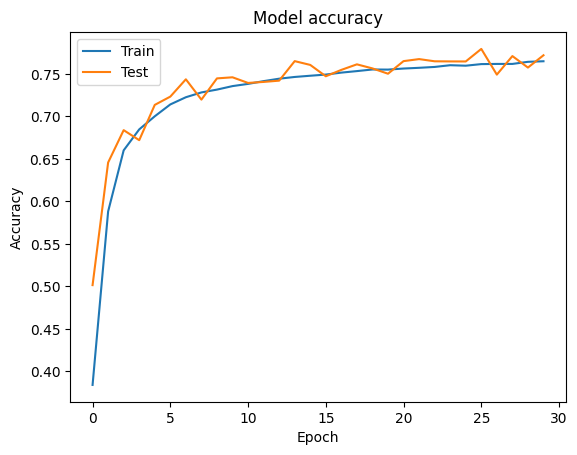

In [5]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


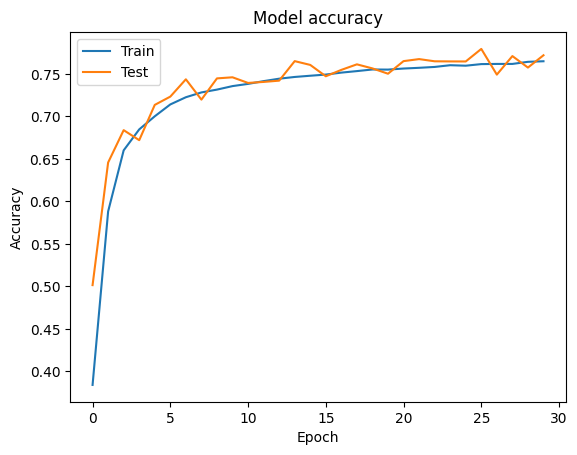

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### RNN with Feaure selections

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'era' with your actual target column name
X = df.drop('era', axis=1).iloc[:, :-6]  # Features
y = df['era']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['era']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(1, num_features), activation='relu'))  # First RNN layer
model.add(SimpleRNN(50, return_sequences=True, activation='relu'))  # Second RNN layer
model.add(SimpleRNN(50, activation='relu'))  # Third RNN layer, no return_sequences needed here
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for RNN
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 954us/step - accuracy: 0.5124 - loss: 1.3161 - val_accuracy: 0.6369 - val_loss: 0.9384
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 916us/step - accuracy: 0.6526 - loss: 0.8940 - val_accuracy: 0.6704 - val_loss: 0.8437
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 920us/step - accuracy: 0.6669 - loss: 0.8500 - val_accuracy: 0.6695 - val_loss: 0.8346
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 923us/step - accuracy: 0.6728 - loss: 0.8333 - val_accuracy: 0.6800 - val_loss: 0.8147
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 912us/step - accuracy: 0.6780 - loss: 0.8113 - val_accuracy: 0.6801 - val_loss: 0.8106
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 918us/step - accuracy: 0.6843 - loss: 0.7975 - val_accuracy: 0.6836 - val_loss: 0.8061
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6868 - loss: 0.7887 - val_accuracy: 0.6829 - val_loss: 0.7857
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 6s 910us/step - accuracy: 0.6902 - loss: 0.7811

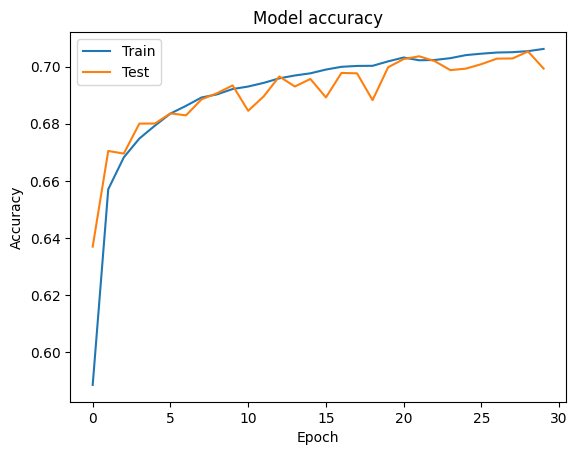

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### LSTM with Feature selection with RF Classifer (No Dropout)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Replace 'era' with your actual target column name
X = df.drop('era', axis=1).iloc[:, :-6]  # Features
y = df['era']  # Target variable
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
importances = forest.feature_importances_
threshold = np.mean(importances)
important_features = X.columns[importances > threshold]
df_reduced = df[important_features.tolist() + ['era']]

# Splitting the dataset into the Training set and Test set
X = df_reduced.iloc[:, :-1].values
y = df_reduced.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
num_features = x_train.shape[1]  
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))
num_features = x_train.shape[1]
num_classes = y_train_encoded.shape[1]

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, num_features)))
model.add(LSTM(units=50))
model.add(Dense(units=num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Reshape input for LSTM
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, num_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, num_features))

# Training the model
history = model.fit(x_train_reshaped, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_test_reshaped, y_test_encoded))

# Evaluating the model
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/30


/Users/maksimchowdhary/.pyenv/versions/3.9.13/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6825/6825 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.4277 - loss: 1.5855 - val_accuracy: 0.6363 - val_loss: 0.9681
Epoch 2/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6413 - loss: 0.9391 - val_accuracy: 0.6608 - val_loss: 0.8743
Epoch 3/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6642 - loss: 0.8631 - val_accuracy: 0.6771 - val_loss: 0.8346
Epoch 4/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6778 - loss: 0.8239 - val_accuracy: 0.6784 - val_loss: 0.8153
Epoch 5/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6840 - loss: 0.8008 - val_accuracy: 0.6831 - val_loss: 0.8086
Epoch 6/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6888 - loss: 0.7888 - val_accuracy: 0.6907 - val_loss: 0.7857
Epoch 7/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6908 - loss: 0.7825 - val_accuracy: 0.6942 - val_loss: 0.7783
Epoch 8/30
6825/6825 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6923 - loss: 0.7724 - val_accurac

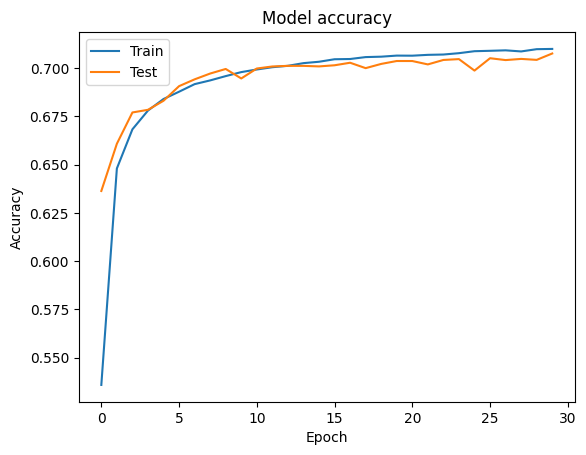

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()